### <strong>第三次作品：學習分類器的評比實驗 </strong>
學號：711233112

姓名：留筠雅
<hr>

 <font color=skyblue>作品目標</font>：  
本次專題計畫旨在比較不同分類器的效果，通過對三組資料進行分類學習和評估。所選用的分類器包括：

- 多項式羅吉斯回歸 (Multinomial Logistic Regression)
- 支援向量機 (Support Vector Machine)
- 神經網絡 (Neural Network)

通過這個作品，希望為不同類型的問題提供分類器或是參數設定的選擇建議，並了解各個分類器在不同條件下的運作情況。
<hr>

### AT & T 的人臉影像資料集
人臉影像共 400 張，每張大小 64×64。

導入套件

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA    
from sklearn.svm import SVC,LinearSVC,LinearSVR
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import  GridSearchCV, StratifiedShuffleSplit
from datetime import datetime

導入資料

In [2]:
df = pd.read_csv('data/face_data.csv')
n_persons = df['target'].nunique() 
X = np.array(df.drop('target', axis=1)) # 400 x 4096
y = np.array(df['target'])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


1. 切割訓練資料與測試資料
2. 進行標準化

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.fit_transform(X_test)

### 使用原始資料訓練多元羅吉斯回歸模型

In [4]:
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)
clf_original_lbfgs= LogisticRegression(solver = 'lbfgs', **opts)# default
clf_original_newtoncg= LogisticRegression(solver = 'newton-cg', **opts)
clf_original_liblin= LogisticRegression(solver = 'liblinear', **opts)

clf_original_lbfgs.fit(X_train_, y_train)
y_pred_lbfgs = clf_original_lbfgs.predict(X_test_)
# 測 試 資 料 之 準 確 率 回 報
print(f'accuracy for testing data under lbfgs:{accuracy_score(y_test, y_pred_lbfgs):.2%}\n')
print(classification_report(y_test, y_pred_lbfgs))

clf_original_newtoncg.fit(X_train_, y_train)
y_pred_new = clf_original_newtoncg.predict(X_test_)
# 測 試 資 料 之 準 確 率 回 報
print(f'accuracy for testing data under newton-cg:{accuracy_score(y_test, y_pred_new):.2%}\n')
print(classification_report(y_test, y_pred_new))

clf_original_liblin.fit(X_train_, y_train)
y_pred_liblin = clf_original_liblin.predict(X_test_)
# 測 試 資 料 之 準 確 率 回 報
print(f'accuracy for testing data under liblinear:{accuracy_score(y_test, y_pred_liblin):.2%}\n')
print(classification_report(y_test, y_pred_liblin))



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


accuracy for testing data under lbfgs:95.00%

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.75      0.86         8
           8       1.00      1.00      1.00         2
           9       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         5
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          17       0.75      1.00  

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.3s finished


accuracy for testing data under newton-cg:95.00%

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.75      0.86         8
           8       1.00      1.00      1.00         2
           9       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         5
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          17       0.75      1.

c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 原始資料訓練出來的模型預測準確率有 95.00%。
-  lbfgs, newton-cg, liblinear 這三個演算法裡以lbfgs, newton-cg ( 95.00% ) 預測出來準確率比 liblinear ( 85.83% ) 好。

繪製特徵值由大而小的分佈，如 scree plot 與累積百分比的 pareto plot

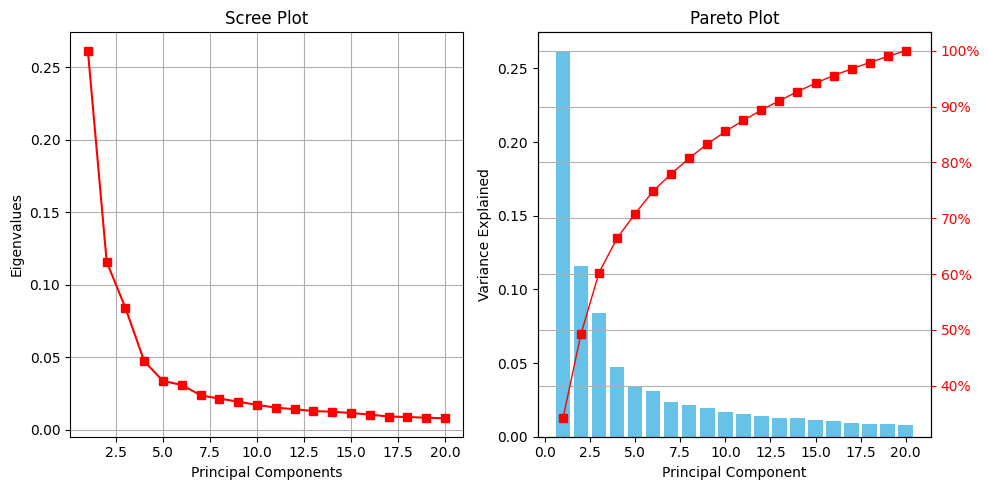

In [5]:
from matplotlib.ticker import PercentFormatter
pca = PCA(n_components = 20).fit(X_train_)
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)
# plot scree plot

# Scree plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(np.arange(1, len(pca.explained_variance_ratio_)+1), 
           pca.explained_variance_ratio_, 
           marker = 's', 
           color = "red")

ax[0].set_xlabel('Principal Components')
ax[0].set_ylabel('Eigenvalues')
ax[0].set_title('Scree Plot')
ax[0].grid(True)

# Pareto plot
x = np.arange(1, 1+len(pca.explained_variance_ratio_))
ax[1].bar( x,
           pca.explained_variance_ratio_, 
           color = '#009ad6', 
           alpha = 0.6, 
           align = 'center', 
           label = 'Variance Explained')

ax_twinx = ax[1].twinx()
ax_twinx.plot(x,
              pca.explained_variance_ratio_.cumsum()/pca.explained_variance_ratio_.sum()*100, 
              marker='s', lw=1, 
              color="red")

ax_twinx.tick_params(axis='y', colors='red')
ax_twinx.yaxis.set_major_formatter(PercentFormatter())

ax[1].set_xlabel('Principal Component')
ax[1].set_ylabel('Variance Explained')
ax_twinx.grid()
ax[1].set_title('Pareto Plot')

plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 觀察 Pareto plot 顯示，前四個主成分已經解釋了約 70 % 的原始變數的變異量。
- 接續利用 PCA 後資料訓練的模型，決定取 70% 為成分比例。

### 使用主成分分析後的資料訓練多元羅吉斯回歸模型。

In [7]:
pca = PCA(n_components = 0.7).fit(X_train_)
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)

solver = 'lbfgs' # ’lbfgs’ is the default
# solver = ’liblinear’
# solver = ’newton−cg’
clf_pca_lbfgs= LogisticRegression(solver = 'lbfgs', **opts)# default
clf_pca_newtoncg= LogisticRegression(solver = 'newton-cg', **opts)
clf_pca_liblin= LogisticRegression(solver = 'liblinear', **opts)

clf_pca_lbfgs.fit(Z_train, y_train)
y_pred_lbfgs = clf_pca_lbfgs.predict(Z_test)
print(f'accuracy for testing data under lbfgs:{clf_pca_lbfgs.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, y_pred_lbfgs))

clf_pca_newtoncg.fit(Z_train, y_train)
y_pred_new = clf_pca_newtoncg.predict(Z_test)
print(f'accuracy for testing data under newton-cg:{clf_pca_newtoncg.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, y_pred_new))

clf_pca_liblin.fit(Z_train, y_train)
y_pred_liblin = clf_pca_liblin.predict(Z_test)
print(f'accuracy for testing data under liblinear:{clf_pca_liblin.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, y_pred_liblin))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to contro

accuracy for testing data under lbfgs:86.67%

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       1.00      1.00      1.00         4
           2       0.67      1.00      0.80         2
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.75      0.86         8
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      0.80      0.89         5
          12       0.50      1.00      0.67         2
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       0.00      0.00  

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- lbfgs, newton-cg, liblinear 這三個演算法裡以 lbfgs, newton-cg ( 86.67\% ) 預測出來準確率比 liblinear ( 80.00% ) 好。這與利用原始資料訓練的結果一樣，都是 lbfgs, newton-cg 比 liblinear 好。
- PCA 後的資料，在這三個模型裡，預測的準確率確實比原始資料的預測準確率來的低，考慮到資料量不大，可以取更高的主成分比例來提高預測準確率。

### 使用原始資料訓練 SVM 模型。

**<font color=yellow>網格搜索：GridSearchCV</font>**

一種調參手段；窮舉搜尋：在所有候選的參數選擇中，透過循環遍歷，嘗試每一種可能性，表現最好的參數就是最終的結果。 其原理就像是在數組裡找到最大值。 這種方法的主要缺點是比較耗時

In [16]:
# Get the current date and time

now = datetime.now()

# Format the date and time as a string

now_str = now.strftime("%Y_%m_%d_%H_%M_%S")

results_file = 'C:\\Users\\f9006\\OneDrive\\Python_code\\ML\\data\\results_' + now_str + '.csv'


opts = dict(tol = 1e-6, max_iter = int(1e6)) # parameters for LogisticRegression

parameters = {'gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'C':[0.1, 1, 10, 100]} # parameters for GridSearchCV


cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, \

                            random_state=0) # 5-fold CV

grid = GridSearchCV(estimator=SVC(**opts), \

                param_grid=parameters, cv=cv, 

                scoring=['accuracy','f1_macro'], refit="accuracy")

grid.fit(X_train_, y_train)


cv_logistic = pd.DataFrame(data = grid.cv_results_)

cv_logistic.to_csv(results_file)

print(grid.best_params_)

print(grid.best_score_)

print(grid.best_estimator_)

{'C': 10, 'gamma': 0.001}
0.6928571428571428
SVC(C=10, gamma=0.001, max_iter=1000000, tol=1e-06)


**<font color=skyblue>對執行結果的觀察紀錄：</font>**

- 根據 param_grid 的值一共會評估 6 x 4 =24 種參數的組合方式，且每一種方式要在訓練集上訓練5次，當訓練結束後可以看到最好的參數組合是 C = 10, gamma = 0.001。
- 接下來的 SVM 模型訓練會帶入最佳參數組合。

In [17]:
C = 10 # SVM regularization parameter
opts_rest = dict(C = C, tol = 1e-6, max_iter = int(1e6))
opts = dict(C = C, decision_function_shape = 'ovo', \
tol = 1e-6, max_iter = int(1e6))
clf_svm_linear = SVC(kernel="linear", **opts)
clf_svm_rbf = SVC(kernel="rbf", gamma=0.001, **opts)
clf_svm_poly = SVC(kernel="poly", degree=3, gamma="auto", **opts)
clf_svm_rest = LinearSVC(**opts_rest) # one vs the rest
#para = {"kernal":["linear", "rbf", "poly"], "C":[0.1, 1, 10], "gamma":[0.1, 1, 10]}
clf_svm_linear.fit(X_train_,y_train)
predictions=clf_svm_linear.predict(X_test_)
print(f'accuracy for testing data under linear:{accuracy_score(y_test, predictions):.2%}\n')
print(classification_report(y_test, predictions))

clf_svm_rbf.fit(X_train_,y_train)
predictions=clf_svm_rbf.predict(X_test_)
print(f'accuracy for testing data under rbf:{accuracy_score(y_test, predictions):.2%}\n')
print(classification_report(y_test, predictions))

clf_svm_poly.fit(X_train_,y_train)
predictions=clf_svm_poly.predict(X_test_)
print(f'accuracy for testing data under poly:{accuracy_score(y_test, predictions):.2%}\n')
print(classification_report(y_test, predictions))

clf_svm_rest.fit(X_train_,y_train)
predictions=clf_svm_rest.predict(X_test_)
print(f'accuracy for testing data under LinearSVC:{accuracy_score(y_test, predictions):.2%}\n')
print(classification_report(y_test, predictions))

accuracy for testing data under linear:95.00%

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.75      0.86         8
           8       1.00      1.00      1.00         2
           9       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         5
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          17       0.75      1.00 

c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1

accuracy for testing data under LinearSVC:85.00%

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       1.00      1.00      1.00         4
           2       0.50      0.50      0.50         2
           3       1.00      0.75      0.86         4
           4       0.67      0.67      0.67         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.38      0.55         8
           8       1.00      1.00      1.00         2
           9       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       0.00      0.

c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- linear 是這四個 SVM 模型裡預測準確率最高的( 95.00% )，LinearSVC 也不錯有 85% 的準確率，其他的核函數預測效果皆很差，推測是資料類型不適合。

### 使用主成分分析後資料訓練 SVM 模型。

In [19]:
# PCA
pca = PCA(n_components = 0.7).fit(X_train_)
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)

clf_svm_linear.fit(Z_train,y_train)
predictions=clf_svm_linear.predict(Z_test)
print(f'accuracy for testing data under linear:{clf_svm_linear.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, predictions))

clf_svm_rbf.fit(Z_train,y_train)
predictions=clf_svm_rbf.predict(Z_test)
print(f'accuracy for testing data under rbf:{clf_svm_rbf.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, predictions))

clf_svm_poly.fit(Z_train,y_train)
predictions=clf_svm_poly.predict(Z_test)
print(f'accuracy for testing data under poly:{clf_svm_poly.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, predictions))

clf_svm_rest.fit(Z_train,y_train)
predictions=clf_svm_rest.predict(Z_test)
print(f'accuracy for testing data under LinearSVC:{clf_svm_rest.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, predictions))



accuracy for testing data under linear:89.17%

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.75      0.86         8
           8       0.50      1.00      0.67         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      0.80      0.89         5
          12       0.50      1.00      0.67         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          17       0.75      1.00 

c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1

accuracy for testing data under LinearSVC:75.00%

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         4
           2       0.50      1.00      0.67         2
           3       1.00      0.50      0.67         4
           4       0.67      0.67      0.67         3
           5       0.60      1.00      0.75         3
           6       1.00      0.67      0.80         3
           7       1.00      0.38      0.55         8
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       0.67      0.67      0.67         3
          11       1.00      0.80      0.89         5
          12       0.50      1.00      0.67         2
          13       1.00      0.67      0.80         3
          14       0.43      1.00      0.60         3
          15       1.00      1.00      1.00         3
          16       0.00      0.

c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- linear 是這四個 SVM 模型裡預測準確率最高的( 89.17% )，這四個模型準確率都有 72% 以上。
- 有兩個模型的預測準確率比原始資料訓練的模型高，推測是有做 PCA 的資料對於未知的資料可能預測能力會更好一些，畢竟不會受其他不重要的特徵影響。

### 利用原始資料訓練 ANN 模型

In [20]:
# hidden_layers = (512,) # one hidden layer
# activation = 'relu' # the default
hidden_layers = (30,)
activation = 'logistic'
opts = dict(hidden_layer_sizes = hidden_layers , verbose = False, \
activation = activation, tol = 1e-6, max_iter = int(1e6))

clf_MLP_sgd = MLPClassifier(solver = 'sgd', **opts) 
clf_MLP_lbfgs = MLPClassifier(solver = 'lbfgs', **opts) 
clf_MLP_adam = MLPClassifier(solver = 'adam', **opts) 

clf_MLP_sgd.fit(X_train_, y_train)
predictions = clf_MLP_sgd.predict(X_test_)
print(f'accuracy for testing data under sgd:{accuracy_score(y_test, predictions):.2%}\n')
print(classification_report(y_test, predictions))

clf_MLP_lbfgs.fit(X_train_, y_train)
predictions = clf_MLP_lbfgs.predict(X_test_)
print(f'accuracy for testing data under lbfgs:{accuracy_score(y_test, predictions):.2%}\n')
print(classification_report(y_test, predictions))

clf_MLP_adam.fit(X_train_, y_train)
predictions = clf_MLP_adam.predict(X_test_)
print(f'accuracy for testing data under adam:{accuracy_score(y_test, predictions):.2%}\n')
print(classification_report(y_test, predictions))


accuracy for testing data under sgd:94.17%

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         4
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         4
           4       0.60      1.00      0.75         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.75      0.86         8
           8       1.00      1.00      1.00         2
           9       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          17       0.75      1.00    

c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 運算時間比多元羅吉斯回歸和 SVM 學習器來得久，約花4分鐘。
- 這三個 ANN 模型裡以 sgd 演算法預測出來的準確率最高( 94.17% )，所有模型都有 90% 以上的準確率。


### 利用主成分分析後的資料訓練 ANN 模型

In [21]:
# PCA
clf_MLP_sgd.fit(Z_train, y_train)  
predictions = clf_MLP_sgd.predict(Z_test)
print(f'accuracy for testing data under sgd:{clf_MLP_sgd.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, predictions))

clf_MLP_lbfgs.fit(Z_train, y_train)
predictions = clf_MLP_lbfgs.predict(Z_test)
print(f'accuracy for testing data under lbfgs:{clf_MLP_lbfgs.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, predictions))

clf_MLP_adam.fit(Z_train, y_train)
predictions = clf_MLP_adam.predict(Z_test)
print(f'accuracy for testing data under adam:{clf_MLP_adam.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, predictions))


accuracy for testing data under sgd:83.33%

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.80      1.00      0.89         4
           2       1.00      0.50      0.67         2
           3       0.67      0.50      0.57         4
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.62      0.77         8
           8       1.00      1.00      1.00         2
           9       0.60      1.00      0.75         3
          10       1.00      0.67      0.80         3
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         2
          13       0.75      1.00      0.86         3
          14       0.75      1.00      0.86         3
          15       0.75      1.00      0.86         3
          16       0.00      0.00    

c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy for testing data under lbfgs:82.50%

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       1.00      1.00      1.00         4
           2       0.50      0.50      0.50         2
           3       1.00      0.75      0.86         4
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       0.67      0.67      0.67         3
           7       1.00      0.75      0.86         8
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         5
          12       0.40      1.00      0.57         2
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         3
          15       1.00      0.67      0.80         3
          16       0.00      0.00  

c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy for testing data under adam:84.17%

              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         4
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.62      0.77         8
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         5
          12       0.50      1.00      0.67         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       0.00      0.00   

c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 有經過 PCA 的資料訓練出來的模型運算時間比原始資料來得快速，約花 30 秒。
- 這三個 ANN 模型裡以 adam 演算法預測出來的準確率最高( 84.17% )，但不同演算法預測出的模型準確率，差別不大。
-  整體來說，有 PCA 過後的資料有降低些許預測準確率。

<hr>

#### **<font color=	#2E8B57 >原始資料的模型訓練觀察結果</font>**
比較 3 組學習器的模型預測準確率，從每個學習器裡取最高測準確率，在原始資料中以多項式羅吉斯回歸和支援向量機學習器預測準確率最高。
 - 多項式羅吉斯回歸 95.00%
 - 支援向量機 95.00%
 - 神經網路 94.17%
  
#### **<font color=	#2E8B57 >主成分分析後的資料的模型訓練觀察結果</font>**
在 PCA 資料中以支援向量機學習器預測準確率最高。
 - 多項式羅吉斯回歸 86.67%
 - 支援向量機 89.17%
 - 神經網路 84.17%
  
#### **<font color=#FA8072> 整體觀察結果：</font>**
1. 以 AT&T 資料集來說，這三種學習分類器使用原始資料來預測的效果皆不錯，但要注意在相同預測正確率之下， ANN 模型須花較多時間訓練。
2. 有主成分分析的資料整體而言會降低一些模型預測準確率。
3. 學習器內不同參數的調整對模型訓練的效果影響巨大。
<hr>